In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

The main parameters of the transformer selected from Kulkrani's book Transformer Design and Pracitce in Engineering (2004 ,chapter 4, pp 162-164)

Mesh Generator: Initial mesh generation
Magnetic Energy 412.4818373316063
zb, ib: 108.9 ohm 174.95 A
SCI: 7.78 [%]
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver: Elapsed time: 00:00.646 s
Bax  [HV] = 83.9 [mT]
Brad [HV] = 34.34 [mT]
Bax  [LV] = 70.76 [mT]
Brad [Lv] = 41.01 [mT]


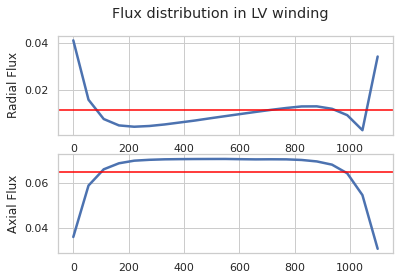

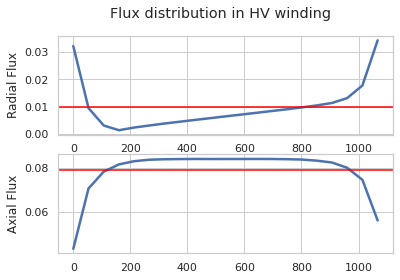

In [2]:
from importlib_resources import files
from src.two_winding_model import TransformerDesign, TwoWindingModel

path = files("data").joinpath("10MVA_example.json")

import json

with open(path) as json_file:
    data = json.load(json_file)

transformer = TransformerDesign.from_dict(data)

trafo_model = TwoWindingModel(input=transformer)
trafo_model.calculate(is_sc=False)

# FEM calculation
trafo_model.fem_simulation()


In [3]:
print(trafo_model.results)

MainResults(wh=1320.0, feasible=True, core_loss=8.1, load_loss=49.72174419001562, copper_mass=0.0, sci=7.53, window_width=199.1, core_mass=7695.5, turn_voltage=46.27, capitalized_cost=0.0, fem_based_sci=7.775099459401166, fem_bax_hv=0.08390267114212163, fem_brad_hv=0.0343449340568137, fem_bax_brad_hv=0.0, fem_bax_lv=0.07076170117694841, fem_brad_lv=0.04100818998808364, fem_bax_brad_lv=0.0)


### Comparing the LV winding results with the manufactured winding:

In [4]:
print(trafo_model.lv_winding)

WindingDesign(inner_radius=230.0, thickness=35.3, winding_height=1100.0, filling_factor=70.0, current_density=2.65, mass=1169.5, dc_loss=19.9, ac_loss=1.4959068418098507, outer_radius=265.3, cable_length=0.0, amper_turns=72029.6)


The inner radius of the measured transformer model is 460/2 = 230 mm, while the outer radius is 530/2 = 265. Therefore the model calculates well these values from the given parameters. 
The estimated AC loss by Kulkarni is 489 W/phase, while the code calculates 1.44/3 = 480 W for the losses. 
The DC losses approximated by the filling factor of the given transformer coil.
The total loss of the LV windings is given 21.8 kW, while the built-in vode calculates: 19.9 kW + 1.45 kW = 21.35 kW

### Comparing the results with the HV calculations:

In [5]:
print(trafo_model.hv_winding)

WindingDesign(inner_radius=315.3, thickness=43.8, winding_height=1067.0, filling_factor=60.0, current_density=2.57, mass=1637.7, dc_loss=26.2, ac_loss=2.1258373482057693, outer_radius=359.1, cable_length=0.0, amper_turns=72064.8)


The inner radius of the HV winding agrees well with manufactured transformers data, which is 630/2 = 315 mm, the outer diameter of the HV winding is 718 mm, which agrees the outer radius of the transformer winding 359.